# OBS: Fiz algo simples, bem documentado (mais ou menos, não consegui colocar .md entre os métodos, mas dei o meu melhor)

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Classe Gridworld
Essa classe define uma grid onde um agente pode se mover. O ambiente inclui características como montanhas e areias movediças que afetam o movimento do agente e (consequentemente) sua recompensa. O grid é representado por uma matriz onde o valor em cada célula pode indicar valores como uma célula vazia, uma montanha, areia movediça, a posição inicial, ou o objetivo.

## Inicialização
O método `__init__` inicializa o ambiente com o tramanho da grid que for passado. Inicialmente o preenchimento é feito com vários zeros, representando células vazias. Também são definidos a posição inicial e o objetivo do agente, além de listas vazias pras montanhas e areias movediças.


In [40]:
class Gridworld:
    def __init__(self, size=8):
        self.size = size
        self.grid = np.zeros((size, size))
        self.start = (0, 0)
        self.goal = (size-1, size-1)
        self.mountain_cells = []
        self.quicksand_cells = []
        self.position = self.start

    def add_mountain(self, cell):
        if cell not in self.mountain_cells:
            self.mountain_cells.append(cell)
            self.grid[cell] = -1

    def add_quicksand(self, cell):
        if cell not in self.quicksand_cells:
            self.quicksand_cells.append(cell)
            self.grid[cell] = -2

    def set_start_goal(self, start, goal):
        self.start = start
        self.position = start
        self.goal = goal
        self.grid[start] = 0
        self.grid[goal] = 0

    def display(self):
        plt.figure(figsize=(5,5))
        plt.imshow(self.grid, cmap="viridis")
        plt.colorbar()
        plt.show()

    def get_actions(self, position):
        actions = []
        for delta in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            new_position = (position[0] + delta[0], position[1] + delta[1])
            if 0 <= new_position[0] < self.size and 0 <= new_position[1] < self.size:
                actions.append(delta)
        return actions

    def get_reward(self, position, action):
        new_position = (position[0] + action[0], position[1] + action[1])
        if new_position in self.quicksand_cells:
            return -100
        elif new_position in self.mountain_cells:
            return -1
        elif new_position == self.goal:
            return 100
        else:
            return -1

    def move_agent(self, action):
        new_position = (self.position[0] + action[0], self.position[1] + action[1])
        if new_position in self.mountain_cells or not (0 <= new_position[0] < self.size and 0 <= new_position[1] < self.size):
            return False
        self.position = new_position
        return True

    def is_terminal(self):
        return self.position in self.quicksand_cells or self.position == self.goal

## Adicionar obstáculos
Os métodos `add_mountain` e `add_quicksand` adicionam (respectivamente) montanhas e areias movediças, que vão afetar o agente na movimentação e nas recompensas também. Montanhas possuem um custo pra serem passadas (atravessadas), enquanto areias movediças têm uma penalidade maior e podem terminar o jogo


## Definindo Início e Objetivo
Com o método `set_start_goal` dá pra redefinir tanto as posições de início quanto o objetivo do agente, assim dá pra recriar tudo sem precisar instanciar de novo


## Visualização do Ambiente
O método `display` é pra visualização. Cada tipo de célula é colorido com uma cor específica pra facilitar a identificação das montanhas, das areias movediças, da posição do agente, e do objetivo.

## Ações Possíveis
O método `get_actions` retorna uma lista de ações possíveis pro agente dada de uma determinada posição. Cada ação é representada como um deslocamento. Esse método é mais pra garantir que o agente não vá escapar dos limites da grid.


## Recompensa
O método `get_reward` calcula a recompensa da execução de uma ação a partir de uma posição específica. A recompensa vai variar de acordo com pra onde o agente vai se mover.

## Movimento e Condição Terminal
O método `move_agent` **tenta** mover o agente com base em uma ação fornecida. O "tenta" foi propositalmente inserido aqui porque ele verifica se a ação é válida e atualiza a posição do agente. O `is_terminal` vê se ele chegou em um ponto terminal, seja areia movediça ou alcançando o objetivo

# Criando e Manipulando o Ambiente
Aqui é instanciado o ambiente `Gridworld`, adicionados os obstáculos, definidas as posições de início e objetivo, e então, com os métodos da classe, o agente é movido e então são verificadas as recompensas e condições de término do jogo.


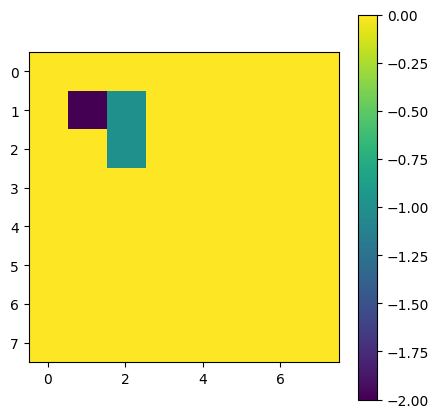

Movimento realizado para: (0, 1)
Recompensa: -1
Movido para: (0, 1)


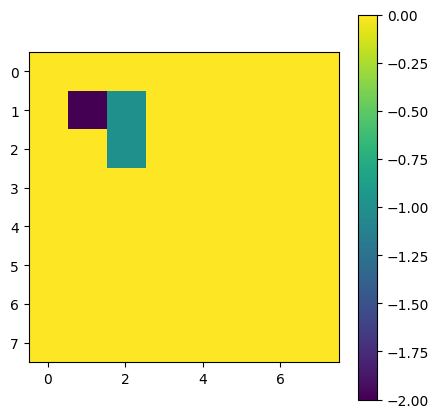

Movido para: (1, 1)
Jogo terminou na posição: (1, 1)


In [41]:
env = Gridworld()
env.add_mountain((1, 2))
env.add_mountain((2, 2))
env.add_quicksand((1, 1))
env.set_start_goal((0, 0), (7, 7))

env.display()

if env.move_agent((0, 1)):
    print("Movimento realizado para:", env.position)
else:
    print("Movimento inválido.")

action = (1, 0)
env.move_agent(action)
print("Recompensa:", env.get_reward(env.position, action))

env.move_agent((1, 0))
if env.is_terminal():
    print("O jogo terminou. Posição final do agente:", env.position)

env.position = env.start
actions = [(0, 1), (1, 0), (0, 1), (1, 0)]

for action in actions:
    if env.move_agent(action):
        print("Movido para:", env.position)
        if env.is_terminal():
            print("Jogo terminou na posição:", env.position)
            break
    else:
        print("Movimento inválido com a ação:", action)
    env.display()